In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
# construct power curve
sp0 = 4
spn = 24
npoints = spn - sp0 + 1
speeds = np.zeros(npoints)
powers = np.zeros(npoints)
for n in range(sp0, spn+1):
    prefix = "../IEA-15-240-RWT-Monopile/output_files/IEA-15-240-RWT_"
    suffix = "mps.out"
    fname = prefix + str(n) + suffix
    print(fname)
    data = np.genfromtxt(fname,skip_header=60008)
    ncol = len(data)
    pwr = data[ncol-2]
    speeds[n-sp0] = float(n)
    powers[n-sp0] = pwr


../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_4mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_5mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_6mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_7mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_8mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_9mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_10mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_11mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_12mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_13mps.out
../IEA-15-240-RWT-Monopile/output_files_IEA-15-240-RWT_default/IEA-15-240-RWT_14mps.out
../IEA-15-240-RWT-Monopile/output_file

In [3]:
# Weibull pdf
p_area = np.zeros(npoints)
k = 2.0
xbar = 10
#A = xbar / gamma(1.0 + 1.0/k)
A = xbar / (np.sqrt(np.pi) / 2)
for n in range(sp0, spn+1):
    left = float(n)-0.5
    right = float(n)
    
    cdf_l = 1.0 - np.exp(-((left/A)**k))
    cdf_r = 1.0 - np.exp(-((right/A)**k))
    
    p_area[n-sp0] = cdf_r - cdf_l

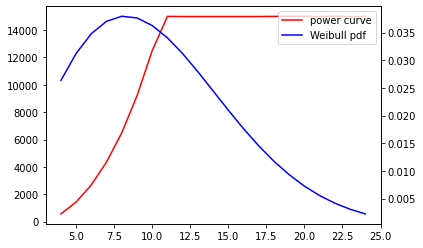

In [4]:
plt.figure

ax1 = plt.subplot()
l1, = ax1.plot(speeds,powers, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(speeds,p_area, color='blue')

plt.legend([l1, l2], ["power curve", "Weibull pdf"])
plt.show()

In [5]:
# Calculate AEP
AEP = 0
for n in range(sp0, spn+1):
    # pwr in kW -> AEP in GWh
    AEP += p_area[n-sp0] * powers[n-sp0] * 24 * 365 / 1e6 
print(AEP)

40.04426307366364
